In [1]:
pip install matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


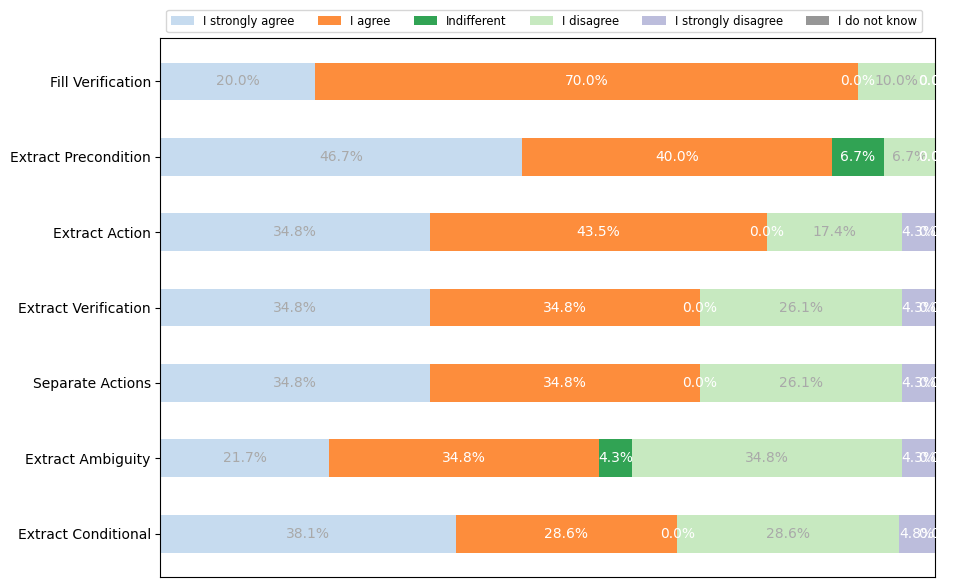

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the image
categories = ['Fill Verification', 'Extract Precondition', 'Extract Action', 'Extract Verification', 'Separate Actions', 'Extract Ambiguity', 'Extract Conditional']
values = [
    [2, 7, 0, 1, 0],  # Fill Verification
    [7, 6, 1, 1, 0],  # Extract Precondition
    [8, 10, 0, 4, 1],  # Extract Action
    [8, 8, 0, 6, 1],  # Extract Verification
    [8, 8, 0, 6, 1],  # Separate Actions
    [5, 8, 1, 8, 1],  # Extract Ambiguity
    [8, 6, 0, 6, 1]   # Extract Conditional
]

# Labels for the segments
labels = ['I strongly agree', 'I agree', 'Neutral', 'I disagree', 'I strongly disagree']

# Function to create the bar chart with percentages
def create_survey_chart_with_percentages(categories, values, labels):
    data = np.array(values)
    row_sums = data.sum(axis=1)[:, np.newaxis]
    data_percent = data / row_sums * 100
    data_cum = data_percent.cumsum(axis=1)

    category_colors = plt.get_cmap('tab20c')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 100)

    for i, (colname, color) in enumerate(zip(labels, category_colors)):
        widths = data_percent[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(categories, widths, left=starts, height=0.5, label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, f"{c:.1f}%", ha='center', va='center', color=text_color)
    
    ax.legend(ncol=len(labels), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')

    plt.show()

create_survey_chart_with_percentages(categories, values, labels)
